<a id='BacktoTop'></a>
# Lab One: Visualization and Data Preprocessing
## MSDS 7331: Data Mining
## Dr. Drew
## Group 3: Shanqing Gu, Manisha Pednekar, Dmitry Andreev and Jonathan Knowles

*Analysis of Online News Popularity Dataset (https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity): explore the statistical summaries of the features, visualize the attributes, and make conclusions from the visualizations and analysis*


## Table of Contents
1. [Business Understanding](#BusinessUnderstanding)
2. [Data Mining Type](#DataMiningType)
3. [Data Quality](#DataQuality)
4. [Simple Statistics](#SimpleStatistics)
5. [Visualize Attributes](#VisualizeAttributes)
6. [Explore Joint Relationships](#ExploreJointAttributes)
7. [Explore Attributes and Class](#ExploreAttributesandClass)
8. [New Features](#NewFeatures)
9. [Exceptional Work](#ExceptionalWork)

<a id='BusinessUnderstanding'></a>
### 01. Business Understanding (10)
[Back to top](#BacktoTop)

#### Section Objective:
Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific *


##### Purpose of this data set
This Online News Popularity Dataset was acquisited from [Mashable](https://mashable.com) 

The data set is available for download at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity)

This data set contains contains nearly 40 thousand records with 61 attributes that provide details and meta-data about articles that were published by Mashable over a two year period. The goal of collecting this data was to predict the number of shares in social networks (measuring popularity).
[might need to include a citation?]



##### Defining and measuring outcomes of this data set
Our group would like to create a classification model that can determine if an article will be popular based on the amount of times it is shared on social media. We have determined that an article can be classified as popular if it is shared X number of times. 

###### Why is this data important?
This data is important because it can be used to help Mashable and other online publishers understand the factors that play a part in how popular their articles are.  With a reliable model for predicting popularity Mashable will understand how they can design articles to achieve maximum popularity and exposure, which is the key objective of any publishing company.

###### How will we measure the effectiveness of our alogrithm? 
We will measure the effectiveness of our alorithm by the accuracy of its classification, we feel that a model that achieves a success rate of ?% would qualify as an effective model.

<a id='DataMiningType'></a>
### 02. Data Mining Type (10)
[Back to top](#BacktoTop)

* Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. 

  Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field) 

0. url: URL of the article (non-predictive) 
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive) 
2. n_tokens_title: Number of words in the title 
3. n_tokens_content: Number of words in the content 
4. n_unique_tokens: Rate of unique words in the content 
5. n_non_stop_words: Rate of non-stop words in the content 
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content 
7. num_hrefs: Number of links 
8. num_self_hrefs: Number of links to other articles published by Mashable 
9. num_imgs: Number of images 
10. num_videos: Number of videos 
11. average_token_length: Average length of the words in the content 
12. num_keywords: Number of keywords in the metadata 
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'? 
14. data_channel_is_entertainment: Is data channel 'Entertainment'? 
15. data_channel_is_bus: Is data channel 'Business'? 
16. data_channel_is_socmed: Is data channel 'Social Media'? 
17. data_channel_is_tech: Is data channel 'Tech'? 
18. data_channel_is_world: Is data channel 'World'? 
19. kw_min_min: Worst keyword (min. shares) 
20. kw_max_min: Worst keyword (max. shares) 
21. kw_avg_min: Worst keyword (avg. shares) 
22. kw_min_max: Best keyword (min. shares) 
23. kw_max_max: Best keyword (max. shares) 
24. kw_avg_max: Best keyword (avg. shares) 
25. kw_min_avg: Avg. keyword (min. shares) 
26. kw_max_avg: Avg. keyword (max. shares) 
27. kw_avg_avg: Avg. keyword (avg. shares) 
28. self_reference_min_shares: Min. shares of referenced articles in Mashable 
29. self_reference_max_shares: Max. shares of referenced articles in Mashable 
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable 
31. weekday_is_monday: Was the article published on a Monday? 
32. weekday_is_tuesday: Was the article published on a Tuesday? 
33. weekday_is_wednesday: Was the article published on a Wednesday? 
34. weekday_is_thursday: Was the article published on a Thursday? 
35. weekday_is_friday: Was the article published on a Friday? 
36. weekday_is_saturday: Was the article published on a Saturday? 
37. weekday_is_sunday: Was the article published on a Sunday? 
38. is_weekend: Was the article published on the weekend? 
39. LDA_00: Closeness to LDA topic 0 
40. LDA_01: Closeness to LDA topic 1 
41. LDA_02: Closeness to LDA topic 2 
42. LDA_03: Closeness to LDA topic 3 
43. LDA_04: Closeness to LDA topic 4 
44. global_subjectivity: Text subjectivity 
45. global_sentiment_polarity: Text sentiment polarity 
46. global_rate_positive_words: Rate of positive words in the content 
47. global_rate_negative_words: Rate of negative words in the content 
48. rate_positive_words: Rate of positive words among non-neutral tokens 
49. rate_negative_words: Rate of negative words among non-neutral tokens 
50. avg_positive_polarity: Avg. polarity of positive words 
51. min_positive_polarity: Min. polarity of positive words 
52. max_positive_polarity: Max. polarity of positive words 
53. avg_negative_polarity: Avg. polarity of negative words 
54. min_negative_polarity: Min. polarity of negative words 
55. max_negative_polarity: Max. polarity of negative words 
56. title_subjectivity: Title subjectivity 
57. title_sentiment_polarity: Title polarity 
58. abs_title_subjectivity: Absolute subjectivity level 
59. abs_title_sentiment_polarity: Absolute polarity level 
60. shares: Number of shares (target) *

In [1]:
# Import libraries which will be uses for Lab_01 project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read csv file
df = pd.read_csv('/Users/shanqinggu/Desktop/OnlineNewsPopularity.csv')
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

In [3]:
# Exclude url and timedelta columns, read from n_tokens_title

df = df.loc[:, ' n_tokens_title':]
df.head() # use df.tail() to read from the bottom

n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.815385         4.0              2.0        1.0   
1                   0.791946         3.0              1.0        1.0   
2                   0.663866         3.0              1.0        1.0   
3                   0.665635         9.0              0.0        1.0   
4                   0.540890        19.0             19.0       20.0   

    num_videos   average_token_length   ...      min_positive_polarity  \
0          0.0               4.680365   ...                   0.100000   
1          0.0               4.913725   ...                   0.033333   
2          0.0               4.393365   ...                   0.100000   
3          0.0               4.404896   ...                   0.136364   
4          0.0               4.682836   ...                   0.033333   

    max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0                     0.7               -0.350000                  -0.600   
1                     0.7               -0.118750                  -0.125   
2                     1.0               -0.466667                  -0.800   
3                     0.8               -0.369697                  -0.600   
4                     1.0               -0.220192                  -0.500   

    max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
0               -0.200000             0.500000                  -0.187500   
1               -0.100000             0.000000                   0.000000   
2               -0.133333             0.000000                   0.000000   
3               -0.166667             0.000000                   0.000000   
4               -0.050000             0.454545                   0.136364   

    abs_title_subjectivity   abs_title_sentiment_polarity   shares  
0                 0.000000                       0.187500      593  
1                 0.500000                       0.000000      711  
2                 0.500000                       0.000000     1500  
3                 0.500000                       0.000000     1200  
4                 0.045455                       0.136364      505  

[5 rows x 59 columns]

In [4]:
# Combine and make 'channel', will fix the warn contents below

Lifestyle_df=df[df[' data_channel_is_lifestyle']==1]
Lifestyle_df[' Channel']='Lifestyle'

Entertainment_df=df[df[' data_channel_is_entertainment']==1]
Entertainment_df[' Channel']='Entertainment'

Bus_df=df[df[' data_channel_is_bus']==1]
Bus_df[' Channel']='Bus'

Socmed_df=df[df[' data_channel_is_socmed']==1]
Socmed_df[' Channel']='Socmedia'

Tech_df=df[df[' data_channel_is_tech']==1]
Tech_df[' Channel']='Tech'

World_df=df[df[' data_channel_is_world']==1]
World_df[' Channel']='World'

df=pd.concat([Lifestyle_df,Entertainment_df,Bus_df,Socmed_df,Tech_df,World_df],axis=0)



/Users/shanqinggu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/shanqinggu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/shanqinggu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [5]:
# Combine and make 'weekday', will fix the warn contents below

Monday_df=df[df[' weekday_is_monday']==1]
Monday_df[' weekday']='Monday'

Tuesday_df=df[df[' weekday_is_tuesday']==1]
Tuesday_df[' weekday']='Tuesday'

Wednesday_df=df[df[' weekday_is_wednesday']==1]
Wednesday_df[' weekday']='Wednesday'

Thursday_df=df[df[' weekday_is_thursday']==1]
Thursday_df[' weekday']='Thursday'

Friday_df=df[df[' weekday_is_friday']==1]
Friday_df[' weekday']='Friday'

Saturday_df=df[df[' weekday_is_saturday']==1]
Saturday_df[' weekday']='Saturday'

Sunday_df=df[df[' weekday_is_sunday']==1]
Sunday_df[' weekday']='Sunday'

df=pd.concat([Monday_df,Tuesday_df,Wednesday_df,Thursday_df,Friday_df,Saturday_df,Sunday_df],axis=0)

/Users/shanqinggu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/shanqinggu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/shanqinggu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [ ]:
# Check column location and prepare to drop

df.columns.get_loc(' data_channel_is_lifestyle')
df.columns.get_loc(' data_channel_is_world')
df.columns.get_loc(' weekday_is_monday')
df.columns.get_loc(' is_weekend') 

In [6]:
df.columns[[11, 12, 13, 14, 15, 16, 29, 30, 31,32, 33, 34, 35, 36 ]]

Index([' data_channel_is_lifestyle', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday',
       ' is_weekend'],
      dtype='object')

In [7]:
# Remove previous channel and weekly columns

df.drop(df.columns[[11, 12, 13, 14, 15, 16, 29, 30, 31,32, 33, 34, 35, 36 ]], axis=1, inplace=True)

<a id='DataQuality'></a>
### 03. Data Quality (15)

#### Section Objective:
Verify data quality: 
1. Explain any missing values, duplicate data, and outliers. Are those mistakes?
    1. To verify the quality of this data set we will:
        1. [Look for the presence of null values](#CheckForNullValues)
        2. [Look for duplicated records](#CheckForDuplicateRecords)
        3. [Look for outliers](#CheckForOutliers)

<a id='CheckForNullValues'></a>
##### Checking for Null Values
[Back to data quality](#BacktoDataQuality)
To perform a check for null values in a data set the *isnull* function from the *pandas* package can be used.

As shown in the code snippet below, there are no null values in this data set. 

In [8]:
# No Missing values in this dataset
pd.isnull(df).sum()

 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
 n_non_stop_words                0
 n_non_stop_unique_tokens        0
 num_hrefs                       0
 num_self_hrefs                  0
 num_imgs                        0
 num_videos                      0
 average_token_length            0
 num_keywords                    0
 kw_min_min                      0
 kw_max_min                      0
 kw_avg_min                      0
 kw_min_max                      0
 kw_max_max                      0
 kw_avg_max                      0
 kw_min_avg                      0
 kw_max_avg                      0
 kw_avg_avg                      0
 self_reference_min_shares       0
 self_reference_max_shares       0
 self_reference_avg_sharess      0
 LDA_00                          0
 LDA_01                          0
 LDA_02                          0
 LDA_03                          0
 LDA_04                          0
 global_subjectivity

<a id='CheckForDuplicateRecords'></a>
##### Checking for Duplicate Records
[Back to data quality](#BacktoDataQuality)
To perform a check for duplicate records in a data set the *dataframe.duplicated* function from the *pandas* package can be used.

As shown in the code snippet below, there are no duplicated records in this data set. 

In [9]:
# No duplicated values in this dataset

df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [ n_tokens_title,  n_tokens_content,  n_unique_tokens,  n_non_stop_words,  n_non_stop_unique_tokens,  num_hrefs,  num_self_hrefs,  num_imgs,  num_videos,  average_token_length,  num_keywords,  kw_min_min,  kw_max_min,  kw_avg_min,  kw_min_max,  kw_max_max,  kw_avg_max,  kw_min_avg,  kw_max_avg,  kw_avg_avg,  self_reference_min_shares,  self_reference_max_shares,  self_reference_avg_sharess,  LDA_00,  LDA_01,  LDA_02,  LDA_03,  LDA_04,  global_subjectivity,  global_sentiment_polarity,  global_rate_positive_words,  global_rate_negative_words,  rate_positive_words,  rate_negative_words,  avg_positive_polarity,  min_positive_polarity,  max_positive_polarity,  avg_negative_polarity,  min_negative_polarity,  max_negative_polarity,  title_subjectivity,  title_sentiment_polarity,  abs_title_subjectivity,  abs_title_sentiment_polarity,  shares,  Channel,  weekday]
Index: []

[0 rows x 47 columns]

<a id='CheckForOutliers'></a>
##### Checking for Outliers
[Back to data quality](#BacktoDataQuality)

To perform a check for the presence of outliers in a data set the *dataframe.describe* function from the *pandas* package can be used.

As shown in the code snippet below, the min and max values for each attribute in the data set fall into a reasonable range and do not indicate the presence of any outliers that will impact the effectiveness of the classification model 

In [10]:
# Outliers will be handled by log transformation due to the sample numbers are more than 30k
# Find which variables need to do log transform 

df_T = df.describe().T

df_T["log"] = (df_T["max"] > df_T["50%"] * 10) & (df_T["max"] > 1)
df_T["log+2"] = df_T["log"] & (df_T["min"] < 0)

df_T["scale"] = ""

df_T.loc[df_T["log"],"scale"] = "log"
df_T.loc[df_T["log+2"],"scale"] = "log+2"

df_T[["mean", "min", "50%", "max", "scale"]]

mean       min            50%  \
 n_tokens_title                    10.416204  2.000000      10.000000   
 n_tokens_content                 585.438317  0.000000     447.000000   
 n_unique_tokens                    0.549702  0.000000       0.532596   
 n_non_stop_words                   1.015010  0.000000       1.000000   
 n_non_stop_unique_tokens           0.699134  0.000000       0.690411   
 num_hrefs                         10.380603  0.000000       7.000000   
 num_self_hrefs                     3.368517  0.000000       3.000000   
 num_imgs                           3.959445  0.000000       1.000000   
 num_videos                         0.998448  0.000000       0.000000   
 average_token_length               4.607736  0.000000       4.669471   
 num_keywords                       7.177798  1.000000       7.000000   
 kw_min_min                        25.539421 -1.000000      -1.000000   
 kw_max_min                      1114.712389  0.000000     656.000000   
 kw_avg_min                       309.083875 -1.000000     237.316667   
 kw_min_max                     12207.393972  0.000000    1300.000000   
 kw_max_max                    753337.156073  0.000000  843300.000000   
 kw_avg_max                    241773.119564  0.000000  228286.666666   
 kw_min_avg                      1031.643292 -1.000000     956.466667   
 kw_max_avg                      5161.325150  0.000000    4044.559329   
 kw_avg_avg                      2890.423023  0.000000    2737.047950   
 self_reference_min_shares       3565.717849  0.000000    1100.000000   
 self_reference_max_shares       9594.667448  0.000000    2700.000000   
 self_reference_avg_sharess      5820.979727  0.000000    2100.000000   
 LDA_00                             0.207364  0.000000       0.040000   
 LDA_01                             0.141303  0.000000       0.033339   
 LDA_02                             0.245294  0.000000       0.050001   
 LDA_03                             0.140653  0.000000       0.033373   
 LDA_04                             0.265356  0.000000       0.050763   
 global_subjectivity                0.439569  0.000000       0.447111   
 global_sentiment_polarity          0.119596 -0.377657       0.119719   
 global_rate_positive_words         0.039891  0.000000       0.039164   
 global_rate_negative_words         0.016320  0.000000       0.015209   
 rate_positive_words                0.695364  0.000000       0.714286   
 rate_negative_words                0.288462  0.000000       0.277778   
 avg_positive_polarity              0.351704  0.000000       0.354545   
 min_positive_polarity              0.091221  0.000000       0.100000   
 max_positive_polarity              0.762561  0.000000       0.800000   
 avg_negative_polarity             -0.255202 -1.000000      -0.250000   
 min_negative_polarity             -0.524040 -1.000000      -0.500000   
 max_negative_polarity             -0.104041 -1.000000      -0.100000   
 title_subjectivity                 0.265740  0.000000       0.100000   
 title_sentiment_polarity           0.068661 -1.000000       0.000000   
 abs_title_subjectivity             0.343692  0.000000       0.500000   
 abs_title_sentiment_polarity       0.145570  0.000000       0.000000   
 shares                          2928.637989  1.000000    1400.000000   

                                         max  scale  
 n_tokens_title                    23.000000         
 n_tokens_content                8474.000000    log  
 n_unique_tokens                  701.000000    log  
 n_non_stop_words                1042.000000    log  
 n_non_stop_unique_tokens         650.000000    log  
 num_hrefs                        304.000000    log  
 num_self_hrefs                   116.000000    log  
 num_imgs                         128.000000    log  
 num_videos                        75.000000    log  
 average_token_length               7.695652         
 num_keywords                      10.000000         
 kw_min_min                      

In [11]:
# Log transform 18 variables. 

df['log_n_tokens_content'] = np.log(df[' n_tokens_content'] + 0.1)
df['log_n_unique_tokens'] = np.log(df[' n_unique_tokens'] + 0.1) 
df['log_n_non_stop_words'] = np.log(df[' n_non_stop_words'] + 0.1)
df['log_n_non_stop_unique_tokens'] = np.log(df[' n_non_stop_unique_tokens'] + 0.1)

df['log_num_hrefs'] = np.log(df[' num_hrefs'] + 0.1)
df['log_num_self_hrefs'] = np.log(df[' num_self_hrefs'] + 0.1)
df['log_num_imgs'] = np.log(df[' num_imgs'] + 0.1)
df['log_num_videos'] = np.log(df[' num_videos'] + 0.1)

df['log_kw_min_min'] = np.log(df[' kw_min_min'] + 2)
df['log_kw_max_min'] = np.log(df[' kw_max_min'] + 0.1)
df['log_kw_avg_min'] = np.log(df[' kw_avg_min'] + 2)

df['log_kw_min_max'] = np.log(df[' kw_min_max'] + 0.1)

df['log_kw_max_avg'] = np.log(df[' kw_max_avg'] + 0.1)
df['log_kw_avg_avg'] = np.log(df[' kw_avg_avg'] + 0.1)

df['log_self_reference_min_shares'] = np.log(df[' self_reference_min_shares'] + 0.1)
df['log_self_reference_max_shares'] = np.log(df[' self_reference_max_shares'] + 0.1)
df['log_self_reference_avg_sharess'] = np.log(df[' self_reference_avg_sharess'] + 0.1)

df['log_shares'] = np.log(df[' shares'] + 0.1)

In [13]:
# find locations for untransformed

df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 18, 19, 20, 21, 22, 44]]

Index([' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words',
       ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs',
       ' num_imgs', ' num_videos', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' shares'],
      dtype='object')

In [14]:
# Drop the above

df.drop(df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 18, 19, 20, 21, 22, 44]], axis=1, inplace=True)

In [15]:
# Check if everything correct so far
df.dtypes

 n_tokens_title                   float64
 average_token_length             float64
 num_keywords                     float64
 kw_max_max                       float64
 kw_avg_max                       float64
 kw_min_avg                       float64
 LDA_00                           float64
 LDA_01                           float64
 LDA_02                           float64
 LDA_03                           float64
 LDA_04                           float64
 global_subjectivity              float64
 global_sentiment_polarity        float64
 global_rate_positive_words       float64
 global_rate_negative_words       float64
 rate_positive_words              float64
 rate_negative_words              float64
 avg_positive_polarity            float64
 min_positive_polarity            float64
 max_positive_polarity            float64
 avg_negative_polarity            float64
 min_negative_polarity            float64
 max_negative_polarity            float64
 title_subjectivity               

In [16]:
# Cut log_shares into 3 groups (0, 1, 2)

df['log_shares_cut'] = pd.qcut(df['log_shares'], 3, labels = False)

In [17]:
# Get 'log_shares' position
df.columns.get_loc('log_shares')

46

In [18]:
# Drop the above column
df.drop(df.columns[46], axis=1, inplace=True)

In [ ]:
# Pairplot and PCA will be moved down later 

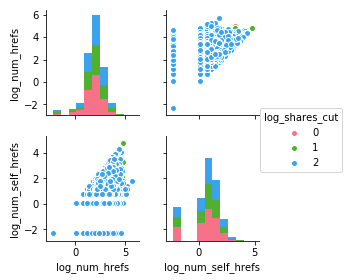

In [19]:
# Samples for pairplot to show details

sns.pairplot(df, vars = ['log_num_hrefs','log_num_self_hrefs'], hue = "log_shares_cut", palette="husl", size=2)

In [20]:
# Pick log transformed variables, transform and prepare for PCA 

from sklearn.preprocessing import StandardScaler
features = ['log_n_tokens_content', 'log_n_unique_tokens','log_n_non_stop_words', 'log_n_non_stop_unique_tokens',
            'log_num_hrefs', 'log_num_self_hrefs','log_num_imgs', 'log_num_videos', 'log_kw_min_min',
            'log_kw_max_min', 'log_kw_min_max', 'log_kw_max_avg','log_kw_avg_avg', 'log_self_reference_min_shares',
            'log_self_reference_max_shares', 'log_self_reference_avg_sharess']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['log_shares_cut']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [21]:
# Try PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [22]:
# Concat two component and prepare to plot

finalDf = pd.concat([principalDf, df[['log_shares_cut']]], axis = 1)
finalDf.head()

principal component 1  principal component 2  log_shares_cut
0               0.708680               6.034881             0.0
1              -3.478523              10.009178             0.0
2              -0.267848               6.828576             1.0
3              -3.443742               9.469293             1.0
4              -2.925588               9.193930             0.0

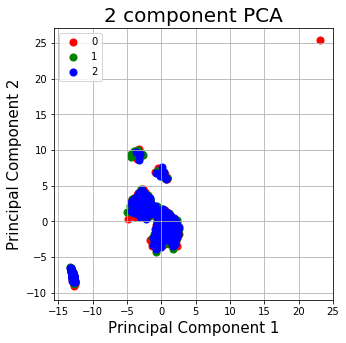

In [23]:
# Plot 2 component PCA

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
log_shares_cuts = [0, 1, 2]
colors = ['r', 'g', 'b']

for log_shares_cut, color in zip(log_shares_cuts, colors):
    indicesToKeep = finalDf['log_shares_cut'] == log_shares_cut
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(log_shares_cuts)
ax.grid()

In [25]:
#  Still trying LDA now

<a id='SimpleStatistics'></a>
### 04. Simple Statistics (10)
[Back to top](#BacktoTop)

* Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful. *

In [26]:
# Quick statistic summary of the data
df.describe().transpose()

count           mean            std  \
 n_tokens_title                 33510.0      10.416204       2.134557   
 average_token_length           33510.0       4.607736       0.646702   
 num_keywords                   33510.0       7.177798       1.952422   
 kw_max_max                     33510.0  753337.156073  213034.725810   
 kw_avg_max                     33510.0  241773.119564  122864.851517   
 kw_min_avg                     33510.0    1031.643292    1067.121534   
 LDA_00                         33510.0       0.207364       0.277868   
 LDA_01                         33510.0       0.141303       0.224786   
 LDA_02                         33510.0       0.245294       0.295739   
 LDA_03                         33510.0       0.140653       0.224266   
 LDA_04                         33510.0       0.265356       0.301748   
 global_subjectivity            33510.0       0.439569       0.099129   
 global_sentiment_polarity      33510.0       0.119596       0.090615   
 global_rate_positive_words     33510.0       0.039891       0.016444   
 global_rate_negative_words     33510.0       0.016320       0.009943   
 rate_positive_words            33510.0       0.695364       0.171064   
 rate_negative_words            33510.0       0.288462       0.150604   
 avg_positive_polarity          33510.0       0.351704       0.091821   
 min_positive_polarity          33510.0       0.091221       0.064398   
 max_positive_polarity          33510.0       0.762561       0.231811   
 avg_negative_polarity          33510.0      -0.255202       0.117386   
 min_negative_polarity          33510.0      -0.524040       0.283454   
 max_negative_polarity          33510.0      -0.104041       0.086693   
 title_subjectivity             33510.0       0.265740       0.314245   
 title_sentiment_polarity       33510.0       0.068661       0.252802   
 abs_title_subjectivity         33510.0       0.343692       0.188397   
 abs_title_sentiment_polarity   33510.0       0.145570       0.217789   
log_n_tokens_content            33510.0       5.999449       1.273157   
log_n_unique_tokens             33510.0      -0.491878       0.282137   
log_n_non_stop_words            33510.0       0.057017       0.303731   
log_n_non_stop_unique_tokens    33510.0      -0.275653       0.291904   
log_num_hrefs                   33510.0       1.964819       0.986069   
log_num_self_hrefs              33510.0       0.645982       1.345538   
log_num_imgs                    33510.0       0.366843       1.456365   
log_num_videos                  33510.0      -1.349393       1.432197   
log_kw_min_min                  33510.0       1.155246       1.721834   
log_kw_max_min                  33510.0       6.312276       1.624741   
log_kw_avg_min                  33510.0       5.291667       1.158304   
log_kw_min_max                  33510.0       3.853464       5.606529   
log_kw_max_avg                  33510.0       8.401823       0.641385   
log_kw_avg_avg                  33510.0       7.901533       0.560973   
log_self_reference_min_shares   33510.0       5.702312       3.891489   
log_self_reference_max_shares   33510.0       6.438064       4.257466   
log_self_reference_avg_sharess  33510.0       6.179735       4.104882   
log_shares_cut                  33510.0       0.931125       0.838419   

                                     min            25%            50%  \
 n_tokens_title                 2.000000       9.000000      10.000000   
 average_token_length           0.000000       4.490385       4.669471   
 num_keywords                   1.000000       6.000000       7.000000   
 kw_max_max                     0.000000  843300.000000  843300.000000   
 kw_avg_max                     0.000000  165789.285715  228286.666666   
 kw_min_avg                    -1.000000       0.000000     956.466667   
 LDA_00                         0.000000       0.025188       0.040000   
 LDA_01                         0.000000       0.025005       0.033339   
 LDA_02  

In [27]:
# Check histograms

df.hist(figsize=(24,24))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a132cf860>,
      dtype=object)

<a id='VisualizeAttributes'></a>
### 05. Visualize Attributes (15)
[Back to top](#BacktoTop)

* Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.*


In [28]:
# Pairplot for log transformed variables, as grouped by Channel

sns.pairplot(df, vars=['log_n_tokens_content', 'log_n_unique_tokens','log_n_non_stop_words', 'log_n_non_stop_unique_tokens',
            'log_num_hrefs', 'log_num_self_hrefs','log_num_imgs', 'log_num_videos', 'log_kw_min_min',
            'log_kw_max_min', 'log_kw_min_max', 'log_kw_max_avg','log_kw_avg_avg', 'log_self_reference_min_shares',
            'log_self_reference_max_shares', 'log_self_reference_avg_sharess'], hue=" Channel", palette="husl", size=2)

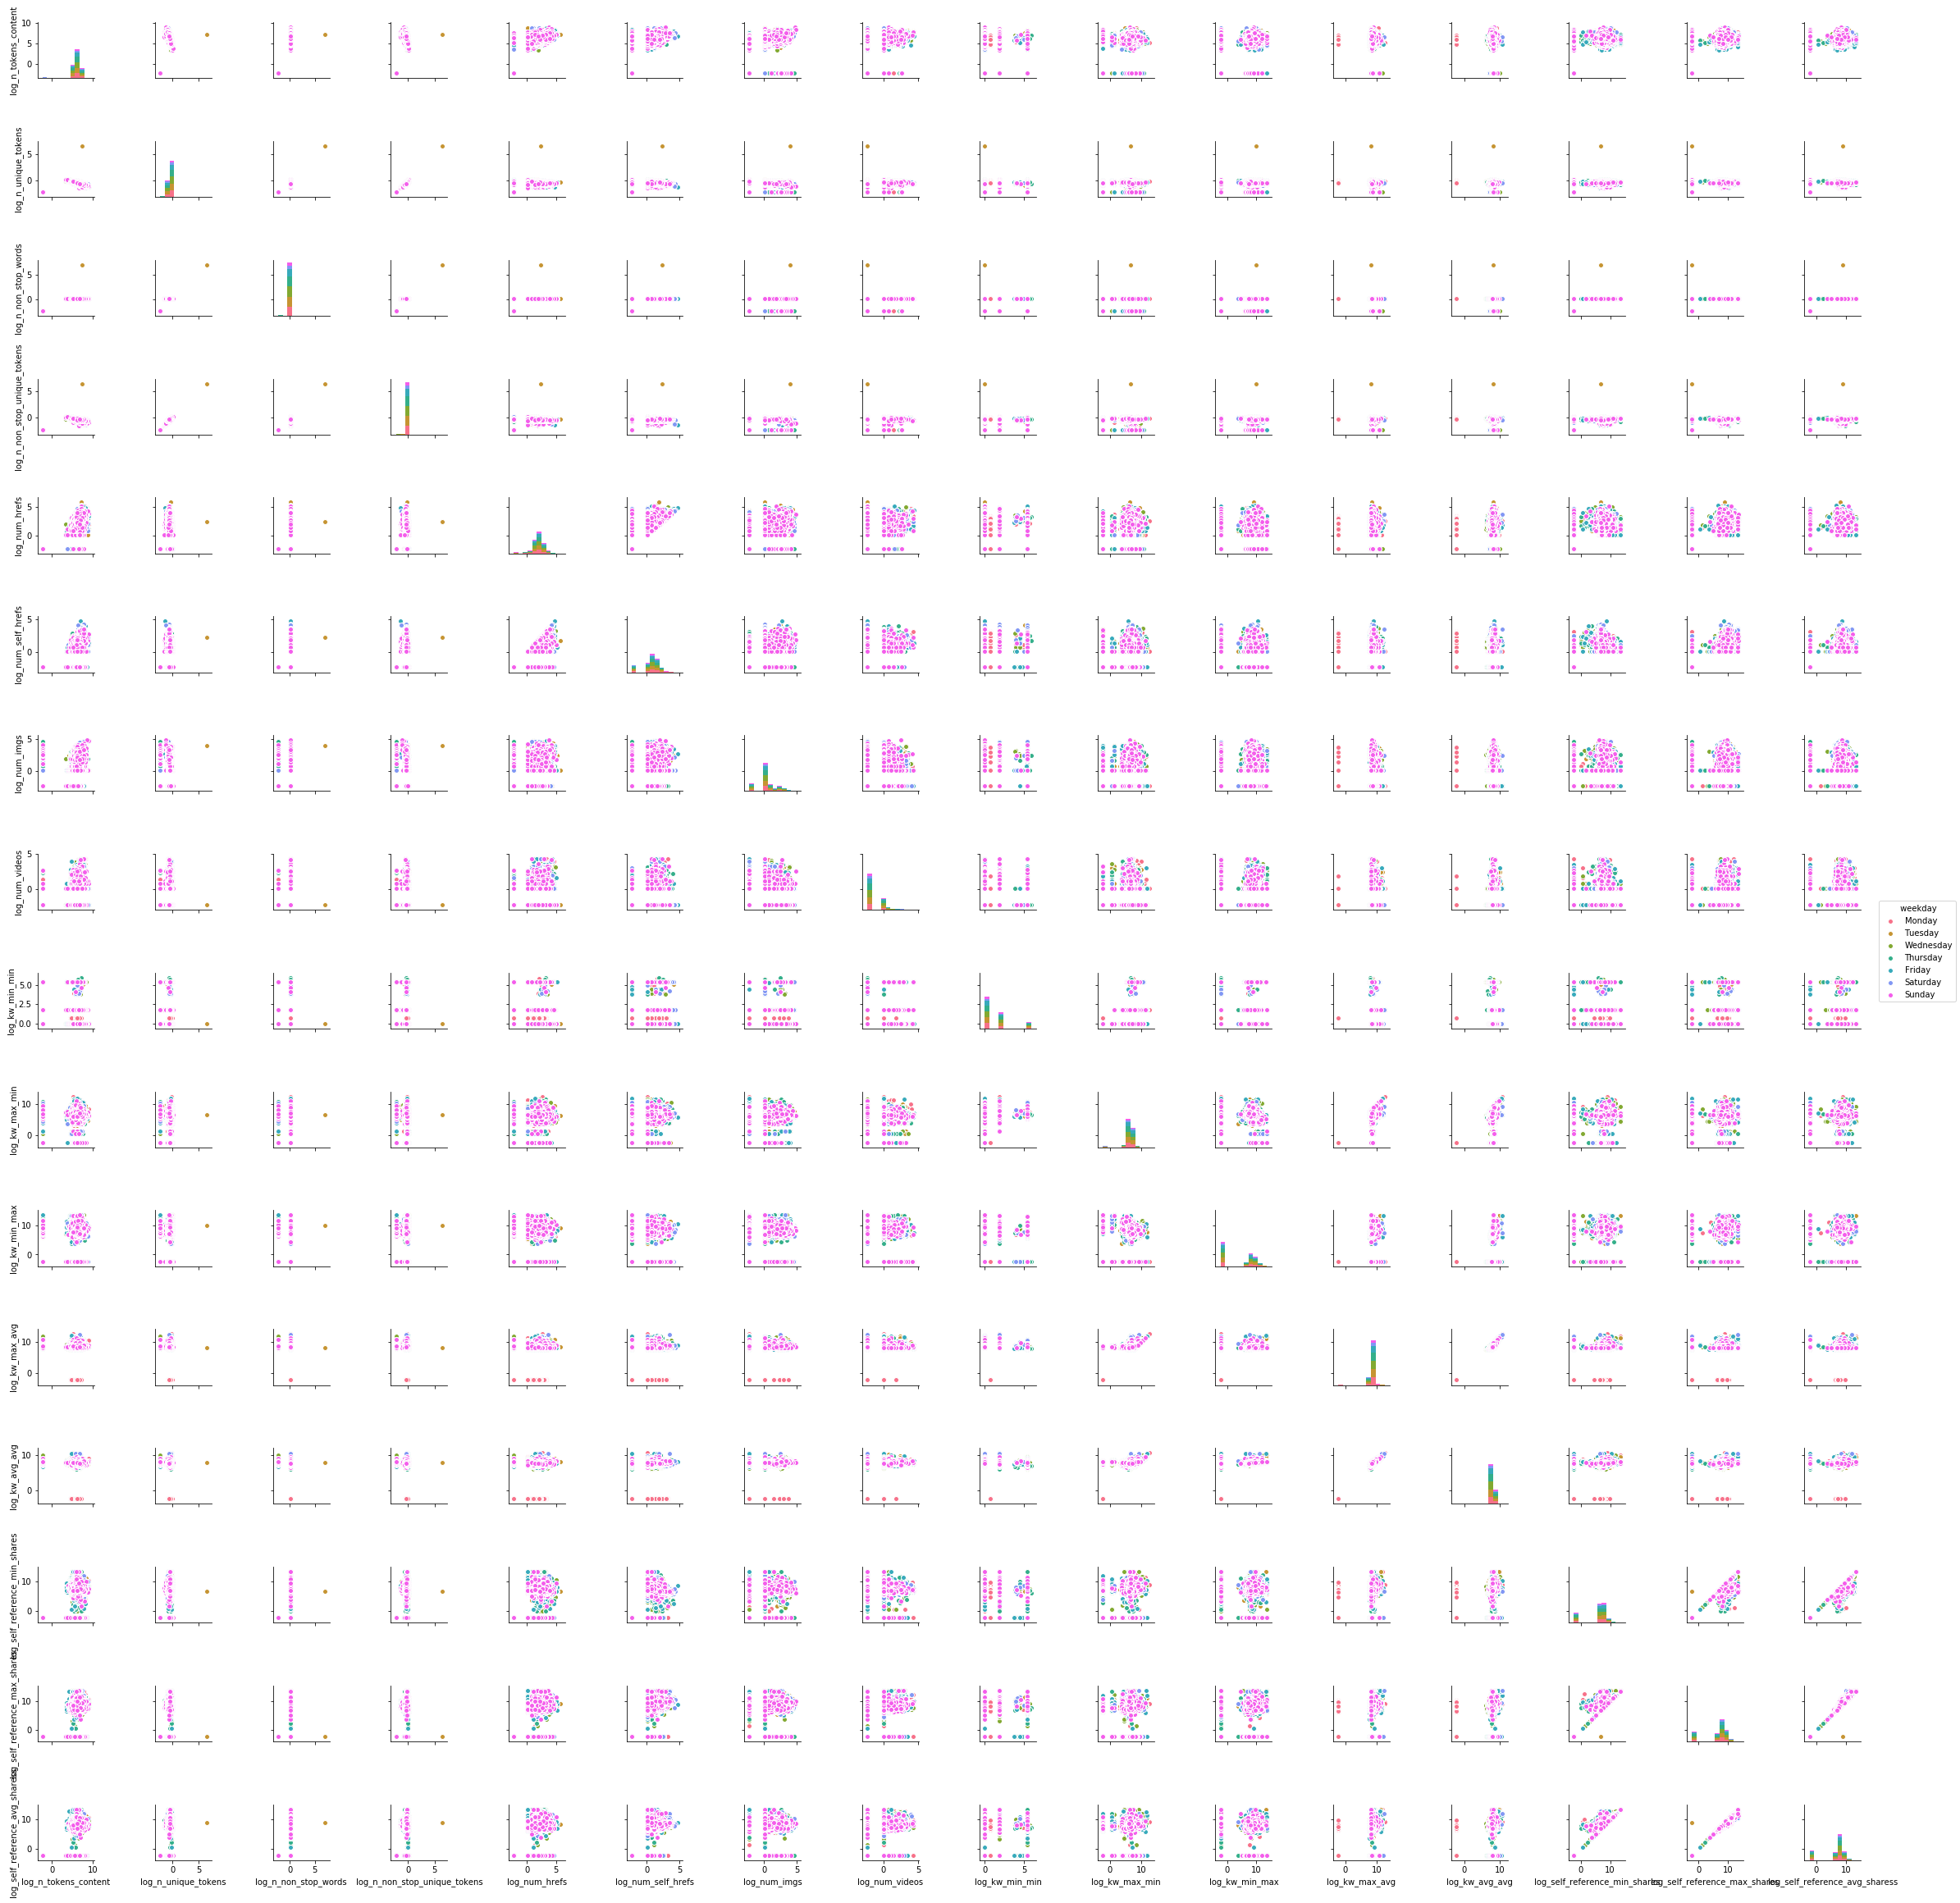

In [29]:
# Pairplot for log transformed variables, as grouped by Weekday

sns.pairplot(df, vars=['log_n_tokens_content', 'log_n_unique_tokens','log_n_non_stop_words', 'log_n_non_stop_unique_tokens',
            'log_num_hrefs', 'log_num_self_hrefs','log_num_imgs', 'log_num_videos', 'log_kw_min_min',
            'log_kw_max_min', 'log_kw_min_max', 'log_kw_max_avg','log_kw_avg_avg', 'log_self_reference_min_shares',
            'log_self_reference_max_shares', 'log_self_reference_avg_sharess'], hue=" weekday", palette="husl", size=2)

<a id='ExploreJointAttributes'></a>
### 06. Explore Joint Attributes (15)
[Back to top](#BacktoTop)

* Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.*


In [30]:
numeric = [c for i,c in enumerate(df.columns) if df.dtypes[i] in [np.float64, np.int64]]
len(numeric)

45

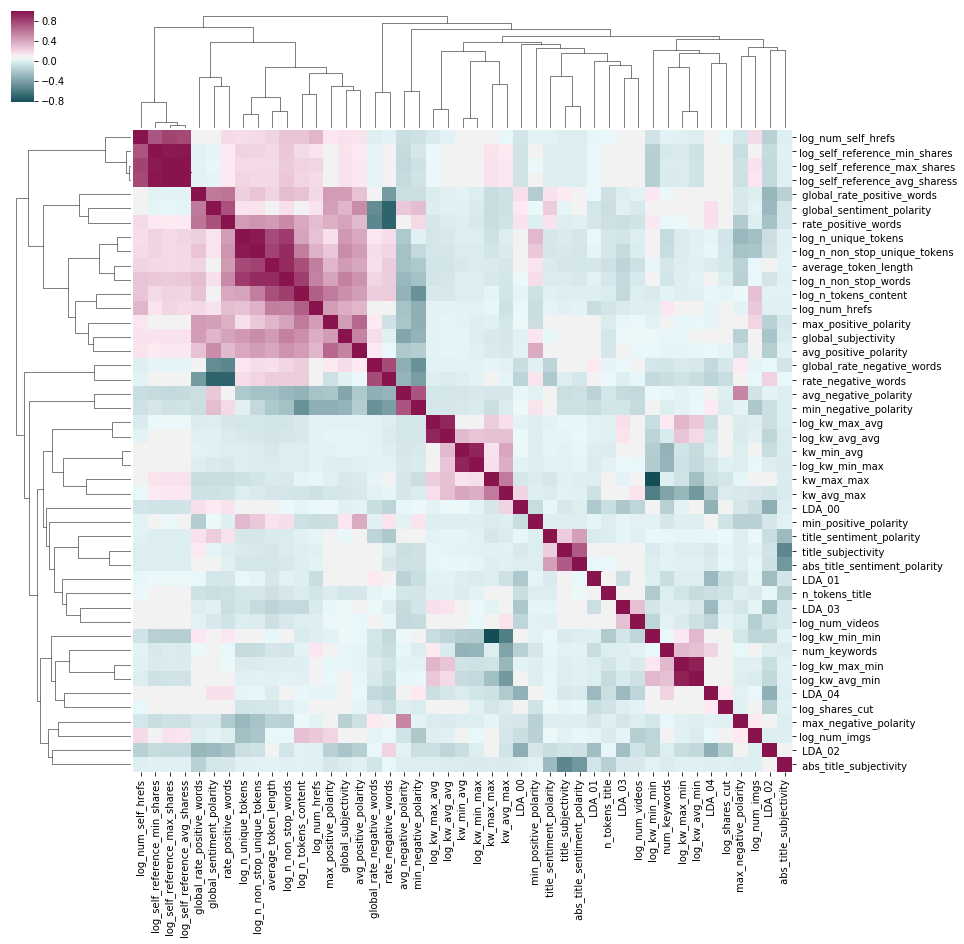

In [31]:
# Correlation 
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True, center="light")
sns.clustermap(df[numeric].corr(), figsize=(14, 14), cmap=cmap);

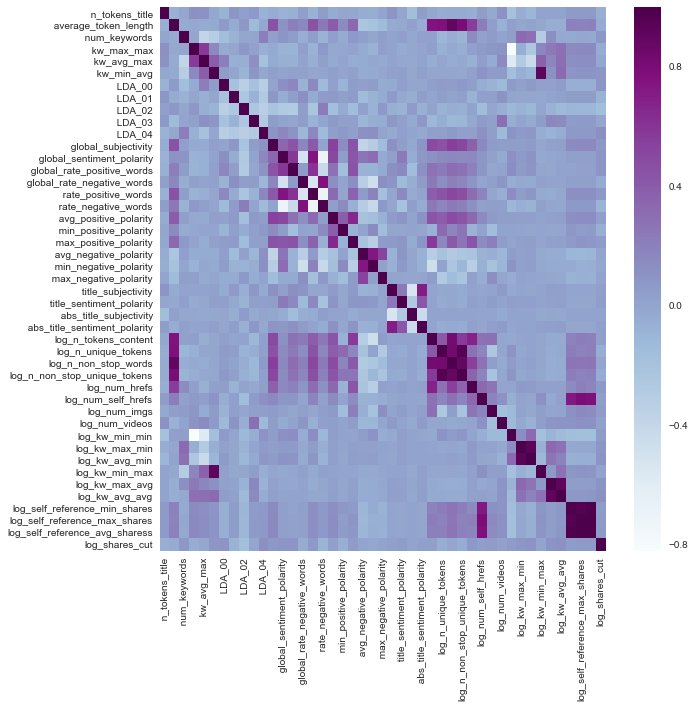

In [32]:
# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

df_heatmap = plt.subplots(figsize=(10, 10))

sns.heatmap(df.corr(), cmap="BuPu")


<a id='ExploreAttributesandClass'></a>
### 07. Explore Attributes and Class (10)
[Back to top](#BacktoTop)

* Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).*


<a id='NewFeatures'></a>
### 08. New Features (5)
[Back to top](#BacktoTop)

* Are there other features that could be added to the data or created from existing features? Which ones? *


<a id='ExceptionalWork'></a>
### 09. Exceptional Work (10)
[Back to top](#BacktoTop)

* You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.*